In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime, timedelta
import numpy as np

In [2]:
file_path23 = []
file_path22 = []
file_path21 = []
file_path20 = []
file_path19 = []
file_path18 = []
file_path17 = []
file_path16 = []
for j in range(12):
    file_path23.append(f"Time series data/fnew-2023-{j+1}.csv")
    file_path22.append(f"Time series data/fnew-2022-{j+1}.csv")
    file_path21.append(f"Time series data/fNew 2021 {j+1}.csv")
    file_path20.append(f"Time series data/fNew 2020 {j+1}.csv")
    file_path19.append(f"Time series data/f 2019 {j+1}.csv")
    file_path18.append(f"Time series data/f 2018 {j+1}.csv")
    file_path17.append(f"Time series data/f 2017 {j+1}.csv")
    file_path16.append(f"Time series data/f 2016 {j+1}.csv")

In [3]:
df23 = [pd.read_csv(file) for file in file_path23]

In [4]:
df22 = [pd.read_csv(file) for file in file_path22]

In [5]:
df21 = [pd.read_csv(file) for file in file_path21]

In [6]:
df20 = [pd.read_csv(file) for file in file_path20]

In [7]:
df19 = [pd.read_csv(file) for file in file_path19]

In [8]:
df18 = [pd.read_csv(file) for file in file_path18]

In [9]:
df17 = [pd.read_csv(file) for file in file_path17]

In [10]:
df16 = [pd.read_csv(file) for file in file_path16]

In [11]:
df = [df16,df17,df18,df19,df20,df21,df22,df23]

In [12]:
var = int(input("For which year would you like a month to month analysis?(16 - 23)"))
if var > 23 or var < 16:
    print('Wrong input')
    var = input("For which year would you like a month to month analysis?")

For which year would you like a month to month analysis?(16 - 23) 16


In [13]:
dff = df[var - 16]

In [14]:
months = ['January', 'February', 'March', 'April', 'May', 'June', 
          'July', 'August', 'September', 'October', 'November', 'December']

In [15]:
mean = []
for i in range(12):
    alt = dff[i]
    mean.append(alt['f'].mean())
print(f'The MEAN of the months in year 20{var} from January to December is:')
mean

The MEAN of the months in year 2016 from January to December is:


[50.00012469310031,
 49.999959434466774,
 49.99935163157108,
 49.999878437499994,
 49.99960146430705,
 49.999848150077135,
 49.99970576948923,
 49.99977019601255,
 49.999632899691385,
 50.000258082437284,
 49.99958763850309,
 49.99938094459378]

In [16]:
stdev = []
for i in range(12):
    alt = dff[i]
    stdev.append(alt['f'].std())
print(f'The STANDARD DEVIATION of the months in year 20{var} from January to December is:')
stdev

The STANDARD DEVIATION of the months in year 2016 from January to December is:


[0.05586816636132356,
 0.054133148818792186,
 0.05603461541688417,
 0.059400231446219684,
 0.057202088112117494,
 0.05436332709591835,
 0.055509918485342924,
 0.05278128727576658,
 0.053231414418722006,
 0.054953242802027596,
 0.056555685087250646,
 0.05530752830269297]

In [17]:
skew = []
for i in range(12):
    alt = dff[i]
    skew.append(alt['f'].skew())
print(f'The SKEWNESS of the months in year 20{var} from January to December is:')
skew

The SKEWNESS of the months in year 2016 from January to December is:


[0.18420039462330567,
 0.17955178514424272,
 0.1625644514814289,
 0.21712817804041615,
 0.192713122831179,
 0.17052949283325863,
 0.18007534293460922,
 0.24807129628458455,
 0.30352814369722364,
 0.18847609995596137,
 0.1507974699611169,
 0.13213733662728175]

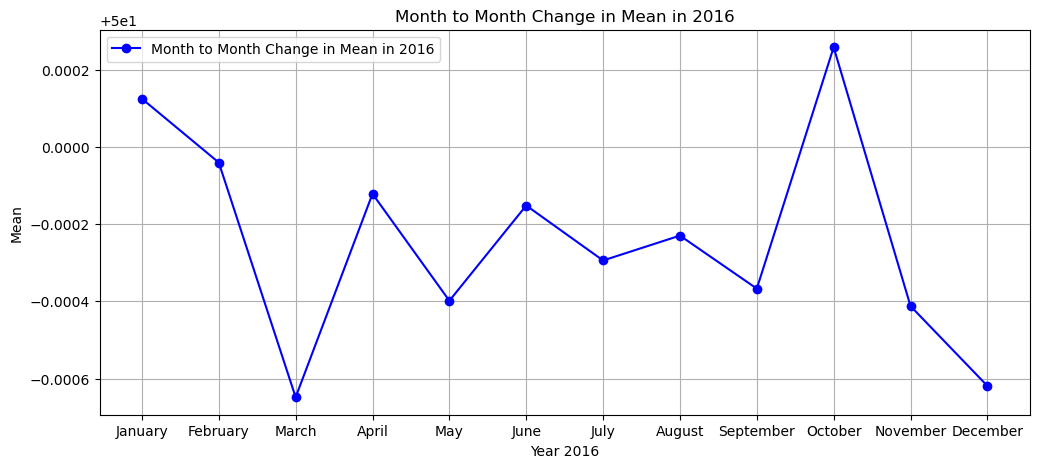

In [18]:
plt.figure(figsize=(12, 5))
plt.plot(months[0:], mean[0:], marker='o', color='b', linestyle='-', label=f'Month to Month Change in Mean in 20{var}')
plt.xlabel(f'Year 20{var}')
plt.ylabel('Mean')
plt.title(f'Month to Month Change in Mean in 20{var}')
plt.grid(True)
plt.legend()
plt.show()

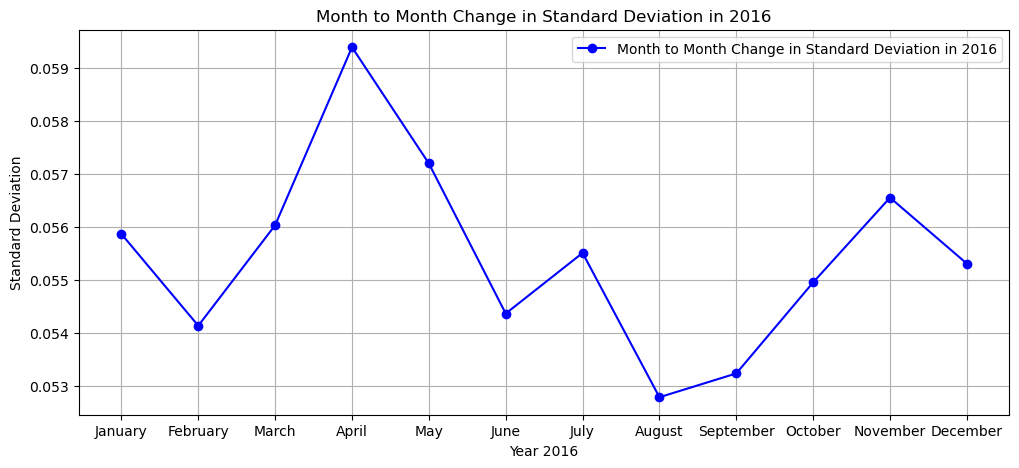

In [19]:
plt.figure(figsize=(12, 5))
plt.plot(months[0:], stdev[0:], marker='o', color='b', linestyle='-', label=f'Month to Month Change in Standard Deviation in 20{var}')
plt.xlabel(f'Year 20{var}')
plt.ylabel('Standard Deviation')
plt.title(f'Month to Month Change in Standard Deviation in 20{var}')
plt.grid(True)
plt.legend()
plt.show()

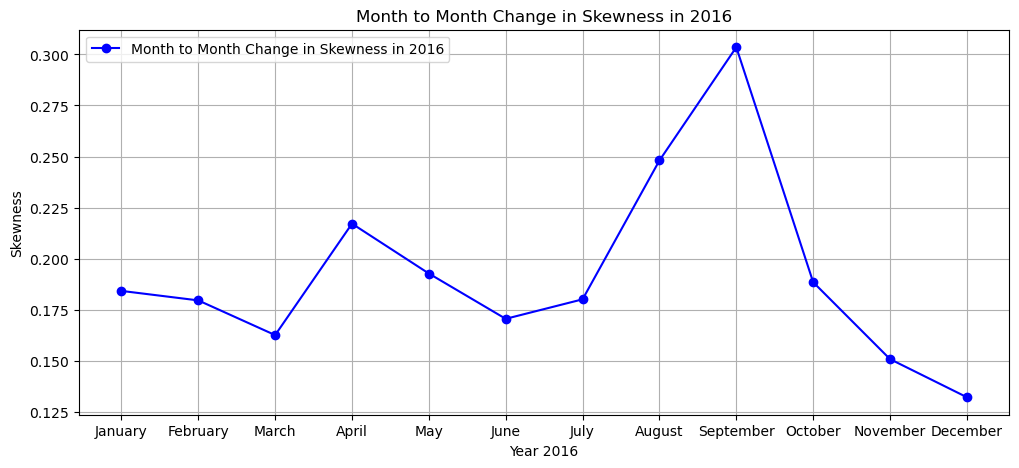

In [20]:
plt.figure(figsize=(12, 5))
plt.plot(months[0:], skew[0:], marker='o', color='b', linestyle='-', label=f'Month to Month Change in Skewness in 20{var}')
plt.xlabel(f'Year 20{var}')
plt.ylabel('Skewness')
plt.title(f'Month to Month Change in Skewness in 20{var}')
plt.grid(True)
plt.legend()
plt.show()

In [43]:
mean_v = []
std_dev = []
sk_ew =[]
for j in range(8):
    for i in range(12):
        alt = df[j][i]
        mean_v.append(alt['f'].mean())
        std_dev.append(alt['f'].std())
        sk_ew.append(alt['f'].skew())

In [47]:
df_10min = []
for j in range(8):
    for i in range(12): 
        df[j][i]['dtm'] = pd.to_datetime(df[j][i]['dtm'], utc=True)
        df_10min.append(df[j][i].resample('10T', on='dtm').mean())

In [67]:
for i in range(len(df_10min)):
    df_10min[i]['del_f'] = df_10min[i]['f'] - 50

In [94]:
cps1 = []
df1_10min = df_10min
e1 = 0.12
for i in range(len(df1_10min)):
    cps_ratio = df1_10min[i]['del_f'] * df1_10min[i]['del_f'] / (e1 ** 2)
    cps = (2 - cps_ratio)*100
    cps1.append(cps.to_frame(name='cps'))

In [120]:
mean_cps1 = []
meancps1 = 0
i = 0
for i in range(len(df1_10min)):
    mean_cps1.append(cps1[i]['cps'].mean())

In [22]:
start_date = datetime(2016, 1, 1)
end_date = datetime(2023, 12, 1)
date_list = []
while start_date <= end_date:
    date_str = start_date.strftime('%B %Y')
    date_list.append(date_str)
    start_date += timedelta(days=31)
    start_date = start_date.replace(day=1)

In [23]:
years = list(range(2016, 2024))  
months = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']

In [98]:
data = {
    'Year': np.repeat(years, len(months)),
    'Month': months * len(years),
    'Mean': mean_v,
    'Standard Deviation': std_dev,
    'Skewness': sk_ew,
    'CPS1 score': mean_cps1
}

In [100]:
dff = pd.DataFrame(data)

In [102]:
mean_crosstable = dff.pivot(index='Month', columns='Year', values='Mean')
std_crosstable = dff.pivot(index='Month', columns='Year', values='Standard Deviation')
skew_crosstable = dff.pivot(index='Month', columns='Year', values='Skewness')
cps1_crosstable = dff.pivot(index='Month', columns='Year', values='CPS1 score')
mean_crosstable_str = mean_crosstable.to_string()
std_crosstable_str = std_crosstable.to_string()
skew_crosstable_str = skew_crosstable.to_string()
cps1_crosstable_str = cps1_crosstable.to_string()

In [27]:
pd.set_option('display.max_columns', None)
pd.set_option('display.width', None)

In [28]:
print("Mean Crosstable:")
print(mean_crosstable_str)

Mean Crosstable:
Year        2016       2017       2018       2019       2020       2021       2022       2023
Month                                                                                        
Apr    49.999878  49.999878  50.000670  49.999552  49.999934  49.999942  49.999384  49.998264
Aug    49.999770  49.999702  49.999890  49.999747  49.999964  49.999397  49.999926  49.999293
Dec    49.999381  49.999787  50.000083  49.999399  49.999871  49.999326  49.999655  49.999715
Feb    49.999959  49.999686  49.999038  49.999948  50.000108  49.999661  49.998789  49.999102
Jan    50.000125  49.999793  49.998279  49.999461  49.999706  49.998951  49.999627  50.000033
Jul    49.999706  49.999840  49.999390  49.999510  49.999065  49.999820  49.999321  49.999172
Jun    49.999848  49.999730  50.000576  49.999347  49.999108  49.999600  49.999305  50.000266
Mar    49.999352  49.999693  49.998407  49.999166  49.998770  49.999476  50.000166  50.000479
May    49.999601  49.999438  49.998767  49.

In [29]:
print("Standard Deviation Crosstable:")
print(std_crosstable_str)

Standard Deviation Crosstable:
Year       2016      2017      2018      2019      2020      2021      2022      2023
Month                                                                                
Apr    0.059400  0.059400  0.065470  0.063192  0.063690  0.061405  0.065917  0.067242
Aug    0.052781  0.059625  0.066557  0.061021  0.065087  0.056961  0.063289  0.071131
Dec    0.055308  0.060521  0.065476  0.065653  0.065637  0.065718  0.068682  0.073112
Feb    0.054133  0.062952  0.066638  0.067533  0.067354  0.065294  0.067501  0.066791
Jan    0.055868  0.057272  0.063057  0.067083  0.066901  0.065318  0.066502  0.067044
Jul    0.055510  0.058447  0.066160  0.063134  0.064728  0.056940  0.066154  0.070592
Jun    0.054363  0.058637  0.065116  0.065724  0.067197  0.056820  0.066083  0.066632
Mar    0.056035  0.061541  0.066643  0.064804  0.065229  0.064475  0.066229  0.068380
May    0.057202  0.057244  0.061135  0.062157  0.066222  0.061759  0.065877  0.068288
Nov    0.056556  0.0622

In [30]:
print("\nSkewness Crosstable:")
print(skew_crosstable_str)


Skewness Crosstable:
Year       2016      2017      2018      2019      2020      2021      2022      2023
Month                                                                                
Apr    0.217128  0.217128  0.173684  0.021993  0.073176  0.016012 -0.011887  0.007425
Aug    0.248071  0.160088  0.080777 -0.167067  0.079276  0.049366 -0.079571 -0.008519
Dec    0.132137  0.143827  0.027453  0.040868  0.082740 -0.025699 -0.125877 -0.060243
Feb    0.179552  0.175251  0.210999  0.109476  0.088170  0.072333  0.036685 -0.051901
Jan    0.184200  0.141618  0.192784  0.055709  0.075563  0.045363 -0.038123 -0.077443
Jul    0.180075  0.167760  0.132483 -0.007209  0.035755  0.026994 -0.031983  0.051441
Jun    0.170529  0.242673  0.225864  0.024631 -0.039932  0.053358 -0.047610 -0.059344
Mar    0.162564  0.155698  0.258905  0.094293  0.027947  0.032388 -0.042444 -0.002858
May    0.192713  0.162299  0.274153  0.002589  0.036094  0.040346  0.010057 -0.022331
Nov    0.150797  0.084224  0.065

In [104]:
print("\nCPS1 score Crosstable:")
print(cps1_crosstable_str)


CPS1 score Crosstable:
Year         2016        2017        2018        2019        2020        2021        2022        2023
Month                                                                                                
Apr    183.996177  183.996177  181.385382  182.218842  179.070954  182.041797  181.375562  180.399911
Aug    186.952225  183.442019  181.345325  182.890788  181.708559  184.584225  181.723667  176.075023
Dec    185.348513  182.996043  180.037427  178.655198  178.736696  179.369068  177.473820  173.743788
Feb    185.683594  181.742086  180.694045  179.649062  177.713481  178.744541  178.832131  179.071724
Jan    184.723755  184.840957  182.318680  180.754368  178.167212  178.964729  179.642321  178.731897
Jul    186.200994  184.388248  182.062582  182.430439  181.194760  184.167548  180.475082  175.766169
Jun    187.295741  183.947224  181.632972  180.971938  180.530021  184.493614  181.405764  179.373259
Mar    185.523142  182.429363  179.868940  180.980422  178